In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [146]:
data = pd.read_csv(r'E:\car.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,1,0
1,sx4,2013,4.75,9.54,43000,2,1,1,0
2,ciaz,2017,7.25,9.85,6900,1,1,1,0
3,wagon r,2011,2.85,4.15,5200,1,1,1,0
4,swift,2014,4.60,6.87,42450,2,1,1,0


In [147]:
data.isnull().sum()#no empty data


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [148]:
data.info()#the data type for each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [149]:
print(data.describe())

              Year  Selling_Price  Present_Price     Kms_Driven   Fuel_Type  \
count   301.000000     301.000000     301.000000     301.000000  301.000000   
mean   2013.627907       4.661296       7.628472   36947.205980    1.212625   
std       2.891554       5.082812       8.644115   38886.883882    0.425801   
min    2003.000000       0.100000       0.320000     500.000000    1.000000   
25%    2012.000000       0.900000       1.200000   15000.000000    1.000000   
50%    2014.000000       3.600000       6.400000   32000.000000    1.000000   
75%    2016.000000       6.000000       9.900000   48767.000000    1.000000   
max    2018.000000      35.000000      92.600000  500000.000000    3.000000   

       Seller_Type  Transmission       Owner  
count   301.000000    301.000000  301.000000  
mean      0.647841      0.867110    0.043189  
std       0.478439      0.340021    0.247915  
min       0.000000      0.000000    0.000000  
25%       0.000000      1.000000    0.000000  
50%   

In [150]:
data.Car_Name.unique()
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


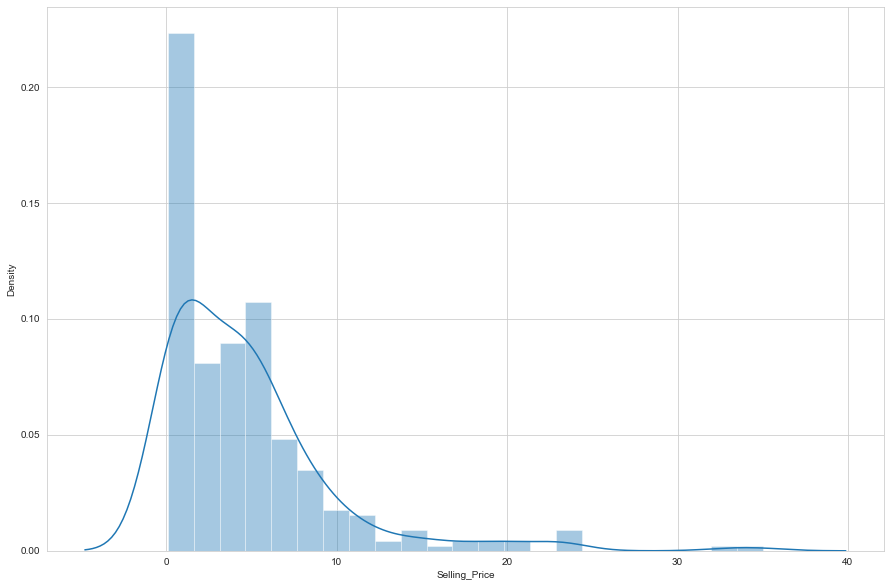

In [151]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.Selling_Price)
plt.show()

In [152]:
print(data.corr())

                   Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
Year           1.000000       0.236141      -0.047584   -0.524342   0.053643   
Selling_Price  0.236141       1.000000       0.878983    0.029187   0.509467   
Present_Price -0.047584       0.878983       1.000000    0.203647   0.440415   
Kms_Driven    -0.524342       0.029187       0.203647    1.000000   0.166801   
Fuel_Type      0.053643       0.509467       0.440415    0.166801   1.000000   
Seller_Type    0.039896       0.550724       0.512030    0.101419   0.352415   
Transmission   0.000394      -0.367128      -0.348715   -0.162510  -0.080466   
Owner         -0.182104      -0.088344       0.008057    0.089216  -0.055705   

               Seller_Type  Transmission     Owner  
Year              0.039896      0.000394 -0.182104  
Selling_Price     0.550724     -0.367128 -0.088344  
Present_Price     0.512030     -0.348715  0.008057  
Kms_Driven        0.101419     -0.162510  0.089216  
Fuel_Type     

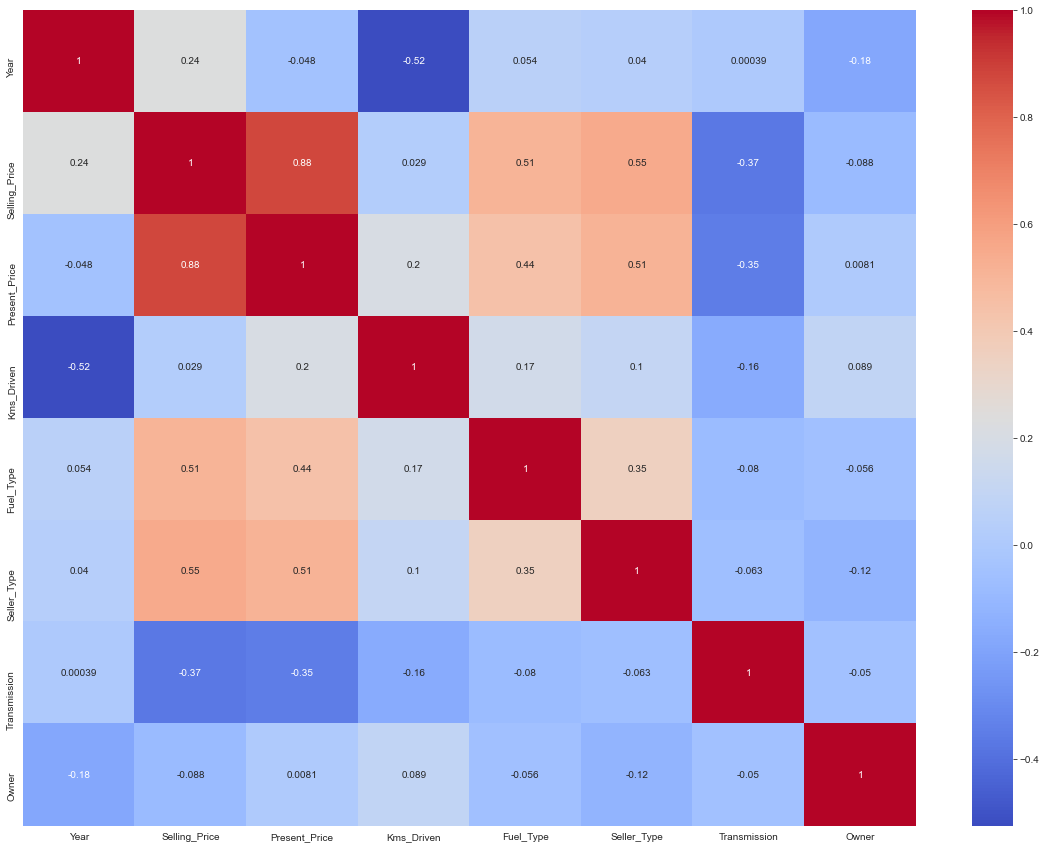

In [153]:
plt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()


In [154]:
predict = "Selling_Price"
data = data[["Owner", "Transmission", "Seller_Type", 
             "Fuel_Type", "Kms_Driven", "Present_Price", 
             "Selling_Price"]]
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])




In [155]:

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)


In [167]:
x_train, X_validation, y_train, Y_validation = train_test_split(x, y, test_size=0.20, random_state=1)


from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
model.score(xtest, predictions)

error_score1 = metrics.r2_score(ytest, test_data_prediction)
print("R squared error : ", error_score1)


R squared error :  0.9462059033928379


SyntaxError: invalid syntax (<ipython-input-186-25cdf1aed61d>, line 3)

In [178]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [10, 20, 30],
   
    'max_depth': [10,20,30,50,70,10],
    
}
clf = RandomForestRegressor(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(x, y)
print(grid.best_params_)
print("mean squared error:"+ str(-grid.best_score_))

{'max_depth': 20, 'n_estimators': 20}
mean squared error:10.524423201106526


In [179]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(xtrain,ytrain)

RandomForestRegressor()

In [180]:
test_data_prediction = regressor.predict(xtest)
print(test_data_prediction)



[ 0.43156667  5.7965      4.3295      5.2415      4.5175      6.6191
 19.9687      8.1331      6.286       6.5273      0.4555      1.143
  6.959       0.7254      8.971       4.3508      4.955       5.8695
  2.559       0.4859      5.3514      2.9065      3.4445      0.2453
  4.715       4.179       5.779       1.1234     23.844       2.594
  1.0485      3.006       0.5494      5.1805      0.6565      0.41258929
  1.1655      1.2795      0.53863095  7.7756      9.252       3.311
  3.987       8.8857      2.196       0.2204      3.8165      0.4347
  5.6633      4.716       5.2285      3.9305      5.245       7.7384
 10.1863      0.5059      2.686       4.3504      0.5676     23.6915
  4.3675    ]


In [160]:
ytest = list(ytest)

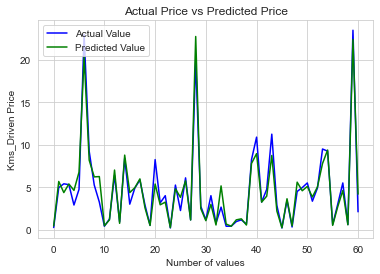

In [161]:
plt.plot(ytest, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Kms_Driven Price')
plt.legend()
plt.show()

In [162]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
model.score(xtest, predictions)

error_score1 = metrics.r2_score(ytest, test_data_prediction)
print("R squared error : ", error_score1)

R squared error :  0.9462059033928379


In [187]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'n_estimators': sp_randint(10,100),
    "max_features":sp_randint(1,13),
    'max_depth': sp_randint(5,50),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
    "criterion":['mse','mae']
}
n_iter_search=20 
clf = RandomForestRegressor(random_state=0)
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='neg_mean_squared_error')
Random.fit(X, y)
print(Random.best_params_)
print("MSE:"+ str(-Random.best_score_))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

{'criterion': 'mae', 'max_depth': 42, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 67}
MSE:10.772520362235298


In [163]:
test_data_prediction = regressor.predict(xtest)
print(test_data_prediction)

[ 0.437       5.675       4.366       5.379       4.623       6.7801
 20.4165      8.1884      6.215       6.2521      0.4541      1.1481
  7.0205      0.7399      8.781       4.3649      4.9383      5.978
  2.573       0.4865      5.3725      2.926       3.2375      0.2417
  4.803       3.8065      5.7535      1.132      22.763       2.4805
  1.0551      2.9715      0.548       5.153       0.6527      0.401375
  1.1505      1.2695      0.54265833  7.7973      8.9567      3.242
  3.9445      8.7369      2.19        0.2131      3.637       0.4391
  5.5946      4.5805      5.086       3.8453      5.036       7.7895
  9.3795      0.501       2.6985      4.6086      0.5673     22.408
  4.1845    ]


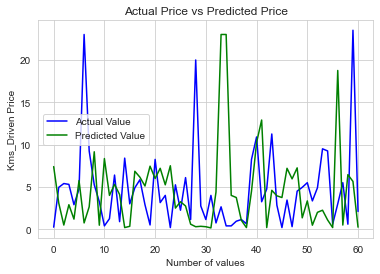

In [170]:
plt.plot(ytest, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Kms_Driven Price')
plt.legend()
plt.show()